<a href="https://colab.research.google.com/github/hwnjoroge/Projects/blob/main/Model_Quality_and_Improvements_Project_Hellen_Njoroge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

As a data professional working for a pharmaceutical company, you need to develop a
model that predicts whether a patient will be diagnosed with diabetes.

Task: Develop a model that predicts whether a patient will be dignosed with diabetes with a threshold for accuracy greater than 0.85. 


#Data Importation





Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#The following settings will improve the default style and font sizes for the charts in this notebook.
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
#loading the dataset
data = pd.read_csv('https://bit.ly/DiabetesDS')

In [ ]:
#viewing the dataset
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#Data Exploration





In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Check to confirm dataset has no duplicates
data[data.duplicated(keep="first")]
data.shape

(768, 9)


The dataset contains 768 rows and 9 columns. 

There are no duplicates in the dataset, therefore each row of the dataset contains information about one customer. 

None of the columns contain missing values.

all columns have float/integer values.


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Some of the observations made from the dataset 
1.   the mean age of the customers is 33, minimum is 21 while the max age is 81
2.   the max recorded number of pregnancies is 17, while the minimum is 0






## Exploratory Data Analysis and Visualization

Exploring the distributions of various columns and visualizing the data using the Plotly, Matplotlib and Seaborn libraries. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efec50c8690>,
      dtype=object)

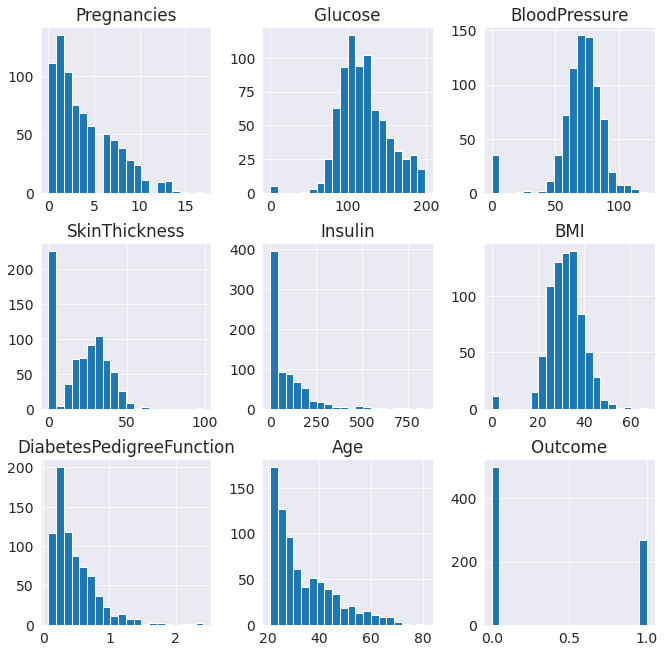

In [ ]:
# Looking at the distribution of the features in the data
fig, ax = plt.subplots(figsize=(11, 11))
data.hist(bins=20, ax=ax)

Some of the observations made 
1.   Some of the features, e.g. Insulin ,DiabetesPedigreeFunction and Age seem to have a right skew. This indicates the presence of outliers on the upper bounds of the feature

2.   Features, e.g. Blood pressure has a left skew. This indicates the presence of outliers on the lower bounds of the feature


In [ ]:
# Looking at the skewness of the data features
data.skew(axis = 0, skipna = True).sort_values(ascending=False)


Insulin                     2.272251
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Pregnancies                 0.901674
Outcome                     0.635017
Glucose                     0.173754
SkinThickness               0.109372
BMI                        -0.428982
BloodPressure              -1.843608
dtype: float64

Some of the observations made :

A positive skew ( > 0) indicates right skewness in the feature while  a negative skew ( < 0) indicates a left skew.

From the skew results, we can confirm that the features we had identified above as skewed indeed are right-skewed, or left skewed.

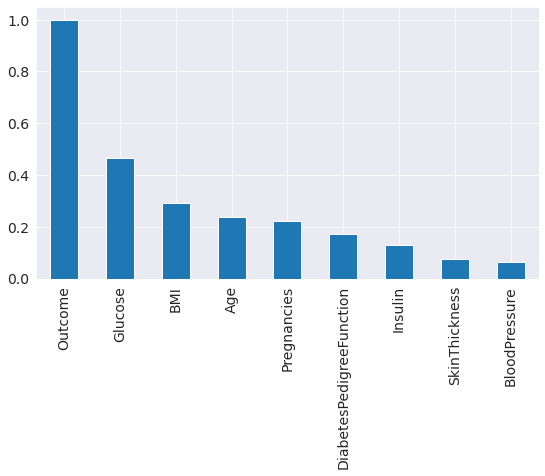

In [ ]:
# Bar plot to visualize how the features captured correlate with the Diabetes Outcome
fig, ax = plt.subplots(figsize=(9,5))
data.corr()["Outcome"].sort_values(ascending=False).plot(kind="bar", ax=ax)

Some of the observations made 

1. Ignoring Outcome, since it’s the correlation of the feature with itself, Glucose has the strongest correlation to the Diabetes Outcome.. The higher a value of the glucose level, the more likely that the Diabetes Outcome diagnosis will be positive.

on the other hand, Blood pressure has the least correlation with the Diabetes Outcome.

`Visualising the distribution of the features with a corr> 0.2 in comparison to the Diabetes Outcome `



In [ ]:
# view how the Glucose levels are distributed in dataset relative to the Diabetes Outcome 
px.histogram(data, x='Glucose', title='Diabetes Outcome vs. Glucose', color='Outcome')

In [ ]:
# view how the BMI values are distributed in dataset relative to the Diabetes Outcome 
px.histogram(data, x='BMI', title='Diabetes Outcome vs. BMI', color='Outcome')

In [ ]:
# view how the Pregnancies are distributed in dataset relative to the Diabetes Outcome 
px.histogram(data, x='Pregnancies', title='Diabetes Outcome vs. Pregnancies', color='Outcome')

In [ ]:
# view how the Age values are distributed in dataset relative to the Diabetes Outcome 
px.histogram(data, x='Age', title='Diabetes Outcome vs. Age', color='Outcome')

Some of the observations made from the above visualisations:

1. The higher the values of the glucose level, age,BMI the higher the count of a positive diabetes diagnosis 

#Data Cleaning and Preparation





## Training, Validation and Test Sets

Splitting the Dataset 

We split our dataset into training and test sets. 80% of the data for the training set, and 20% for the test set. 

We also specifying the random_state to 42 to endure reproducibility in the notebook.

In [ ]:
#splitting the dataset using the train_test_split function 
train_df, test_df = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
#check the shape of the split datasets
print('train_df.shape :', train_df.shape)
print('test_df.shape :', test_df.shape)


train_df.shape : (614, 9)
test_df.shape : (154, 9)


In [ ]:
#view the train_df
train_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
60,2,84,0,0,0,0.0,0.304,21,0
618,9,112,82,24,0,28.2,1.282,50,1
346,1,139,46,19,83,28.7,0.654,22,0
294,0,161,50,0,0,21.9,0.254,65,0
231,6,134,80,37,370,46.2,0.238,46,1
...,...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26,0
106,1,96,122,0,0,22.4,0.207,27,0
270,10,101,86,37,0,45.6,1.136,38,1
435,0,141,0,0,0,42.4,0.205,29,1


## Identifying Input and Target Columns

In this dataset, the target column 'Outcome' was identified and omitted from the training data and the input columns 

In [ ]:
input_columns = list(train_df.columns)[:-1]
target_columns = 'Outcome'

In [ ]:
#checking the features columns that will be used as the input columns in our models
input_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [ ]:
#checking the feature column that will be used as the target column in our models
target_columns

'Outcome'

In [ ]:
train_inputs = train_df[input_columns].copy()
train_targets = train_df[target_columns].copy()


In [ ]:
#view the training dataset
train_inputs.head(3)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22


In [ ]:
#view the training target
train_targets.head(3)

60     0
618    1
346    0
Name: Outcome, dtype: int64

In [ ]:
test_inputs = test_df[input_columns].copy()
test_targets = test_df[target_columns].copy()

In [ ]:
test_inputs.head(3)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21


In [ ]:
#view the test target 
test_targets.head(3)

668    0
324    0
624    0
Name: Outcome, dtype: int64

## Scaling Numeric Features

From the skewness observed earlier, we shall scale the numeric features to ensure that no particular feature has a disproportionate impact on the model. 

The numeric columns in our dataset have varying ranges and will scaled to a small range of values between $(0,1)$ 


In [ ]:
#selecting the feature columns from training set and assigning them to the variable numeric cols
numeric_columns = train_inputs.columns.tolist()
print(numeric_columns)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


Scaling using the `MinMaxScaler` from `sklearn.preprocessing` to scale the numeric column values to the $(0,1)$ range.

In [ ]:
#fit the scaler to the numeric columns 
scaler = MinMaxScaler().fit(data[numeric_columns])

In [ ]:
#scaling the train and test datasets using the .tranform method
train_inputs[numeric_columns] = scaler.transform(train_inputs[numeric_columns])
test_inputs[numeric_columns] = scaler.transform(test_inputs[numeric_columns])

In [ ]:
#verifying the scaled values in the train set
train_inputs.describe().loc[['min', 'max']]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
min,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,0.636364,1.0,1.0,1.0,1.0


In [ ]:
#verifying the scaled values in the test set
test_inputs.describe().loc[['min', 'max']]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
min,0.000000,0.311558,0.000000,0.0,0.000000,0.000000,0.010248,0.000000
max,0.764706,0.989950,0.934426,1.0,0.684397,0.792846,0.560205,0.766667


#Data Modelling





### Decision Tree Model 

To train a Decision Tree model, we use the `DecisionTreeClassifier` class from Scikit-learn.

Training the model to predict the Diabetes Outcome

In [ ]:
decision_tree_model = DecisionTreeClassifier(random_state=42)

Training the model using `model.fit`.

In [ ]:
decision_tree_model.fit(train_inputs, train_targets)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

An optimal decision tree has now been created using the training data.

### Random Forest Model
To train a Random Forest model, we use the RandomForestClassifier class from Scikit-learn.

Training the RandomForest Model  to predict the Diabetes 'Outcome' values.

In [ ]:
random_model = RandomForestClassifier(n_jobs=-1, random_state=42)

`Fitting our data to the model ie Training the model with the train dataset.`

In [ ]:
random_model.fit(train_inputs, train_targets)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

### Logistic Regression Model

Training a logistic Regression Model to predict the Diabetes 'Outcome' values.


In [ ]:
logistic_model = LogisticRegression(solver='liblinear')

`Fitting our data to the model ie Training the model with the train dataset.`

In [ ]:
logistic_model.fit(train_inputs, train_targets)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

####`Predicting using the models Decision Tree, Random Forest and Logistic Regression `

In [ ]:
decision_train_preds = decision_tree_model.predict(train_inputs)

random_train_preds = random_model.predict(train_inputs)

Logistic_train_preds = logistic_model.predict(train_inputs)

####`Checking the accuracy of the models on the test sets using .score `

In [ ]:
decision_tree_model.score(test_inputs, test_targets)

0.7467532467532467

In [ ]:
random_model.score(test_inputs, test_targets)

0.7207792207792207

In [ ]:
logistic_model.score(test_inputs, test_targets)

0.7857142857142857

The logistic regression model achieves the highest accuracy of 78%, followed by the decison tree model at 74%



## Hyperparameter Tuning 

### Decision Tree Hyperparameter Tuning 

In [ ]:
# checking the Decision tree models depth in the above before hyperparameter tuning
decision_tree_model.tree_.max_depth

13

#### `max_depth`

Reducing the maximum depth of the decision tree to prevent the tree from memorizing all training examples, which  may in turn lead to better generalization in the test dataset. Setting the hyperparameter max_depth to 3

In [ ]:
decision_tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
decision_tree_model.fit(train_inputs, train_targets)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

Computing the accuracy of the model on the training and test sets using `model.score`

In [ ]:
decision_tree_model.score(train_inputs, train_targets)

0.7768729641693811

In [ ]:
decision_tree_model.score(test_inputs, test_targets)

0.7597402597402597

After reducing the max-depth from 13 to 3, the training accuracy of the model has reduced from 100% to 77% , while
the accuracy on the test set also incresed from 74.6% to 75.9%

Trying out different depths using a helper function to see which value of max_depth has the least Test prediction Error

In [ ]:
def max_depth_error(md):
    decision_tree_model = DecisionTreeClassifier(max_depth=md, random_state=42)
    decision_tree_model.fit(train_inputs, train_targets)
    train_accuracy = 1 - decision_tree_model.score(train_inputs, train_targets)
    test_accuracy = 1- decision_tree_model.score(test_inputs, test_targets)
    return {'Max Depth': md, 'Training Error': train_accuracy, 'Test Prediction Error': test_accuracy}
    

In [ ]:
#the range of max depth is set to 13 which is the initial decision tree max_depth. 
#we are looking to see which value of the max_depth within that range will improve the test prediction error the most.
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 14)])

In [ ]:
errors_df

,Max Depth,Training Error,Test Prediction Error
0,1,0.265472,0.259740
1,2,0.228013,0.227273
2,3,0.223127,0.240260
3,4,0.201954,0.305195
4,5,0.157980,0.207792
5,6,0.133550,0.253247
6,7,0.089577,0.266234
7,8,0.055375,0.246753
8,9,0.030945,0.233766
9,10,0.016287,0.246753


At max_depth =5, the Test Prediction Error is the least.


Setting the hyperparameter max_depth to 5 and computing the accuracy of the model on the training and test sets using model.score


In [ ]:
decision_tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
decision_tree_model.fit(train_inputs, train_targets)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
decision_tree_model.score(train_inputs, train_targets)

0.8420195439739414

In [ ]:
decision_tree_model.score(test_inputs, test_targets)

0.7922077922077922

After reducing the max-depth from 13 to 5, the training accuracy of the model has reduced from 100% to 84% ,  while the test prediction accuracy increased from 74.4% to 79%

#### `min_samples_split`

this prohibits creating nodes that don't contain enough observations from the training set.


Trying out different minimum sample splits using a helper function to see which value of min_samples_split has the least Test Prediction Error

In [ ]:
def min_sample_split_error(md):
    decision_tree_model = DecisionTreeClassifier(min_samples_split=md, random_state=42)
    decision_tree_model.fit(train_inputs, train_targets)
    train_acc = 1 - decision_tree_model.score(train_inputs, train_targets)
    test_acc = 1 - decision_tree_model.score(test_inputs, test_targets)
    return {'Minimum Sample Split': md, 'Training Error': train_acc, 'Test Prediction Error': test_acc}

In [ ]:
samplesplit_errors_df = pd.DataFrame([min_sample_split_error(md) for md in range(2, 25)])

In [ ]:
samplesplit_errors_df

,Minimum Sample Split,Training Error,Test Prediction Error
0,2,0.000000,0.253247
1,3,0.008143,0.246753
2,4,0.022801,0.240260
3,5,0.024430,0.240260
4,6,0.034202,0.240260
5,7,0.055375,0.240260
6,8,0.063518,0.253247
7,9,0.065147,0.246753
8,10,0.073290,0.240260
9,11,0.074919,0.240260


At min_samples_split = 12, the Test Prediction Error is the least.
Setting the hyperparameter min_samples_split to 12, computing the accuracy of the model on the training and test sets using model.score


In [ ]:
decision_tree_model = DecisionTreeClassifier(min_samples_split=12, random_state=42)
decision_tree_model.fit(train_inputs, train_targets)
decision_tree_model.score(train_inputs, train_targets)

0.9218241042345277

In [ ]:
decision_tree_model.score(test_inputs, test_targets)

0.7662337662337663

After setting the min_sample_split to 12, the training accuracy of the model has reduced from 100% to 92.18% , the  the test accuracy increased from 74.4% to 76.6%

#### `min_samples_leaf`

This hyperparameter prevents the algorithm from adding leaf nodes that don't have enough observations from the training set.


Trying out different min_samples-leaf using a helper function to see which value of min_samples_leaf has the least Test prediction Error 

In [ ]:
def min_sample_leaf_error(md):
    decision_tree_model = DecisionTreeClassifier(min_samples_leaf=md, random_state=42)
    decision_tree_model.fit(train_inputs, train_targets)
    train_accuracy = 1 - decision_tree_model.score(train_inputs, train_targets)
    test_accuracy = 1 - decision_tree_model.score(test_inputs, test_targets)
    return {'Minimum Sample Leaf': md, 'Training Error': train_accuracy, 'Test Prediction Error': test_accuracy}

In [ ]:
samplesleaf_errors_df = pd.DataFrame([min_sample_split_error(md) for md in range(2, 25)])

In [ ]:
samplesleaf_errors_df

,Minimum Sample Split,Training Error,Test Prediction Error
0,2,0.000000,0.253247
1,3,0.008143,0.246753
2,4,0.022801,0.240260
3,5,0.024430,0.240260
4,6,0.034202,0.240260
5,7,0.055375,0.240260
6,8,0.063518,0.253247
7,9,0.065147,0.246753
8,10,0.073290,0.240260
9,11,0.074919,0.240260


At min_samples_leaf = 12, the Test Prediction Error is the least.

Setting the hyperparameter min_samples_leaf to 12, and computing the accuracy of the model on the training and test sets using model.score


In [ ]:
decision_tree_model = DecisionTreeClassifier(min_samples_leaf=12, random_state=42)

In [ ]:
decision_tree_model.fit(train_inputs, train_targets)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
decision_tree_model.score(train_inputs, train_targets)

0.8436482084690554

In [ ]:
decision_tree_model.score(test_inputs, test_targets)

0.7597402597402597

After setting the min_sample_leaf to 12, the training accuracy of the model has reduced from 100% to 84% , while the test prediction accuracy increased from 74.4% to 75.9%





#### `Combination of hyperparameters max_depth and  min_samples_split`

Combining the optimal values of the max_depth and min_samples_split and then retraining the model, and testing for accuracy using model.score




In [ ]:
decision_tree_model = DecisionTreeClassifier(max_depth=5, min_samples_split=12, random_state=42)

In [ ]:
decision_tree_model.fit(train_inputs, train_targets)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
decision_tree_model.score(train_inputs, train_targets)

0.8371335504885994

In [ ]:
decision_tree_model.score(test_inputs, test_targets)

0.7922077922077922

After setting the `min_sample_split` 12 and the `max_depth` to 5, the training accuracy of the model has reduced from 100% to 83.7% , while the test prediction accuracy increased from 74.4% to 79.2%


The combination of `max_depth` =5 and `min_sample_split`=12 results in the highest test prediction accuracy of 79.2% in comparison to the test prediction accuracies from single tuned hyperparameters.





### Hyperparameter Tuning with Random Forests


#### `n_estimators`

This argument will set the number of decision trees in the random forest. The default used in training the model was 100

Varying the n-estimators to **300 estimators**

In [ ]:
random_model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=300)
random_model.fit(train_inputs, train_targets)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
random_model.score(train_inputs, train_targets)

1.0

In [ ]:
random_model.score(test_inputs, test_targets)

0.7337662337662337

After setting the n_estimators=300, the training accuracy of the model has remained 100% , while the accuracy on the test set improved from 72.7% to 73.3% 

In [ ]:
#Varying the estimators to n_estimators=150

random_model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=150)
random_model.fit(train_inputs, train_targets)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
random_model.score(train_inputs, train_targets)

1.0

In [ ]:
random_model.score(test_inputs, test_targets)

0.7337662337662337

After setting the n_estimators=150, the training accuracy of the model has remained 100% , the test set improved from 72.7% to 73.3% 

#### `Combination of hyperparameters `

setting the hyperparameters as below and then retraining the model, and testing for accuracy

1.   max_depth to 5
2.   min_samples_split=5
3.   n_estimators=75
4.   min_samples_leaf =6


In [ ]:
random_model = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=3, min_samples_split=5, n_estimators=75, min_samples_leaf =6)
random_model.fit(train_inputs, train_targets)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
random_model.score(train_inputs, train_targets)

0.7850162866449512

In [ ]:
random_model.score(test_inputs, test_targets)

0.7922077922077922

After setting the `min_sample_split =5` , the `max_depth =5` , `n_estimators=75` and `min_samples_leaf =6` the training accuracy of the model has reduced from 100% to 78.5% , while the test prediction accuracy increased from 72.07% to 79.2%


The combination of these hyperparameters results in the highest test prediction accuracy of 79.2% in comparison to the test prediction accuracies before tuning



#Summary of Findings and Recommendations


All models show improvements on the training set of  which suggests that the models generalize well to data not seen before. 

Random Forest Model:
After tuning the hyperparamters `min_sample_split =5` , the `max_depth =5` , `n_estimators=75` and `min_samples_leaf =6`  the Random Forest achieved the best accuracy score on the dataset at 79.2%


Decision Tree Model: 
After tuning the hyperparameters`max_depth` =5 and `min_sample_split`=12, the decision tree model gives also gives the best accuracy on the test data at 79.2%

Logistic Regression Model:
The accuracy of the model on the test set are 78.5% 

In this case, i will advise the pharmaceutical company to use the  Random Forest model  while making the Diabetes Outcome diagnosis from their customers data.